# Задача

Нужно применить линейную регрессию и предсказать стоимость машин. Понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнать, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные.

1. Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.
2. Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.
3. Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.
4. Преобразуйте категориальные переменные с помощью pd.get_dummies().
5. Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? (\(R^2\))
6. Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \(R^2\), коэффициентах и их значимости. Какую модель лучше оставить?

## План работы
1. Загрузка данных и анализ их
2. Создание первого признака
3. Посчитаем корреляцию между price и другими переменными
4. Линейная регрессия

## _Загрузка данных и анализ их_

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
cars = pd.read_csv('cars.csv')

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.shape

(205, 26)

In [6]:
# Проверим тип данных
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Посмотрим на наличие пропусков
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
cars.describe(include=['object', 'bool'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### _Выводы_

- Загрузил данные, проверил типы данных - они соответствуют содержанию
- Пропусков в данных нет
- Количество названий машин 147, что очень много для дальнейшего анализа, нужно преобразовать данные

## _2. Создание первого признака_

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company). Для этого используем столбец CarName, разобьём значения ячеек по пробелу и запишим в колонку первый элемент.

In [10]:
for i in cars.CarName:
    cars['company'] = cars.CarName.apply(lambda i: i.split(' ')[0])
    cars
cars.company.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: company, dtype: object

In [11]:
# Осталось уникальных названий 28
cars.company.nunique()

28

In [12]:
# Удалим столбец CarName, он нам больше не пригодится
cars = cars.drop(columns = 'CarName')

In [13]:
# Посмотрим на уникальные значения company. Часть из них оказалась с ошибками
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# Приведем всё к нижнему регистру
cars.company = cars.company.str.lower()

In [15]:
# Исправим ошибки в названиях
def fix_company(to_rep, how_rep):
    cars.company.replace(to_rep, how_rep, inplace=True)

In [16]:
fix_company('maxda', 'mazda')
fix_company('porcshce', 'porsche')
fix_company('toyouta', 'toyota')
fix_company(['vw', 'vokswagen'], 'volkswagen')

In [17]:
cars.company.nunique()

22

В итоге осталось 22 уникальных производителя. Посмотрим на количество автомобилей каждой марки

In [18]:
cars.groupby('company', as_index=False) \
    .agg({'price': 'count'})\
    .rename(columns={'price': 'quantity'}) \
    .sort_values('quantity', ascending=False).head()

,company,quantity
19,toyota,32
12,nissan,18
9,mazda,17
11,mitsubishi,13
6,honda,13


## _3. Посчитаем корреляцию между price и другими переменными_

Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:

'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower' также не забыв про то, что мы предсказываем – 'price'.

После этого посчитаем корреляцию между price и другими переменными.

In [19]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [20]:
cars_base = cars[['price','company', 'fueltype', 'aspiration','carbody', 
                  'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 
                  'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']]

In [21]:
cars_base.head()

,price,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154
3,13950.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102
4,17450.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115


Посмотрим как распределены данные, нет ли выбросов

''

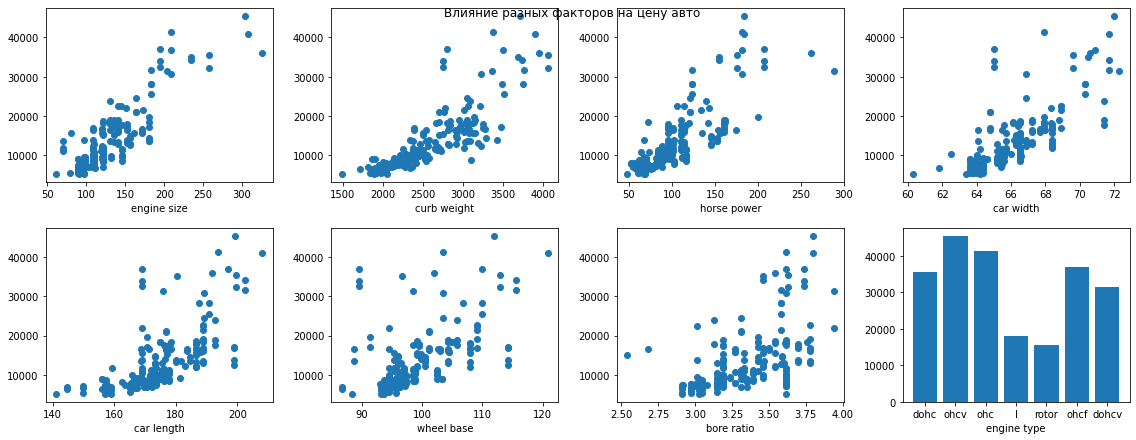

In [22]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 6))
fig.suptitle('Влияние разных факторов на цену авто')
ax1.scatter(x=cars_base['enginesize'], y=cars_base['price']) 
ax1.set_xlabel('engine size')
ax2.scatter(x=cars_base['curbweight'], y=cars_base['price'])
ax2.set_xlabel('curb weight')
ax3.scatter(x=cars_base['horsepower'], y=cars_base['price'])
ax3.set_xlabel('horse power')
ax4.scatter(x=cars_base['carwidth'], y=cars_base['price'])
fig.tight_layout()
ax4.set_xlabel('car width')
ax5.scatter(x=cars_base['carlength'], y=cars_base['price'])
ax5.set_xlabel('car length')
ax6.scatter(x=cars_base['wheelbase'], y=cars_base['price'])
ax6.set_xlabel('wheel base')
ax7.scatter(x=cars_base['boreratio'], y=cars_base['price'])
ax7.set_xlabel('bore ratio')
ax8.bar(cars_base['enginetype'], cars_base['price'])
ax8.set_xlabel('engine type')
;

Посчитаем коэффициенты корреляции Пирсона

In [37]:
cars_base.corr().round(2).sort_values('price', ascending=False)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueltype_q
price,1.00,0.58,0.68,0.76,0.84,0.87,0.55,0.81,-0.11
enginesize,0.87,0.57,0.68,0.74,0.85,1.00,0.58,0.81,-0.07
curbweight,0.84,0.78,0.88,0.87,1.00,0.85,0.65,0.75,-0.22
horsepower,0.81,0.35,0.55,0.64,0.75,0.81,0.57,1.00,0.16
carwidth,0.76,0.80,0.84,1.00,0.87,0.74,0.56,0.64,-0.23
carlength,0.68,0.87,1.00,0.84,0.88,0.68,0.61,0.55,-0.21
wheelbase,0.58,1.00,0.87,0.80,0.78,0.57,0.49,0.35,-0.31
boreratio,0.55,0.49,0.61,0.56,0.65,0.58,1.00,0.57,-0.05
fueltype_q,-0.11,-0.31,-0.21,-0.23,-0.22,-0.07,-0.05,0.16,1.00


Видим зависимоть цены авто от различных факторов, больше всего зависит от объема двигателя

Линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому применим pd.get_dummies()

In [24]:
cars_base.dtypes

price             float64
company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
dtype: object

In [43]:
cars_dummy = pd.get_dummies(data=cars_base[['price', 'company', 'fueltype', 'aspiration','carbody',
                                            'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 
                                            'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                                            'horsepower']], drop_first = True)

In [44]:
cars_dummy.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0


In [45]:
cars_dummy.shape

(205, 49)

## _4. Линейная регрессия_

__Для оценки качества модели была выбрана метрика R2__

Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.

In [46]:
results = smf.ols('price ~ horsepower', cars_dummy).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.48e-48
Time:                        11:44:45   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

Полученная модель объясняет 65 % изменчивости

Теперь построим ещё две модели:
- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

Попробуем выбрать из этих моделей самую удачную!

In [47]:
x = cars_dummy.drop(['price'], axis = 'columns')
x = sm.add_constant(x) #добавим константу, чтобы был свободный член

In [48]:
y = cars_dummy['price']

In [49]:
model = sm.OLS(y, x) #говорим модели, что у нас ЗП, а что НП
results = model.fit() # строим регрессионную прямую
print(results.summary()) # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           4.86e-89
Time:                        12:04:28   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

Теперь строим модель со всеми предикторами, кроме марок машин

In [51]:
cols_to_keep = cars_dummy.columns[~cars_dummy.columns.str.startswith('company_')]

In [52]:
cols_to_keep

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [54]:
x2 = cars_dummy[cols_to_keep].drop('price', axis='columns')
x2 = sm.add_constant(x2)

In [56]:
model = sm.OLS(y, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.86e-81
Time:                        12:08:48   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

- Если судить чисто по диагностическим показателям (вроде R2), то модель со всеми предикторами лучшая
- Большинство коэффициентов, связанных с марками машин, статистически незначимы

Оставим только те параметры, которые статистически значимо влияют на цену

In [59]:
cars_corr_param = results.params[results.pvalues.values < 0.05].round(2).to_frame().reset_index()
cars_corr_param.columns = ['param', 'coeff']
cars_corr_param

,param,coeff
0,carwidth,541.87
1,horsepower,86.82
2,fueltype_gas,-2423.09
3,carbody_hardtop,-3728.09
4,carbody_hatchback,-4639.13
5,carbody_sedan,-3337.79
6,carbody_wagon,-4315.47
7,enginetype_dohcv,-17130.53
8,enginetype_ohc,4006.57
9,enginetype_ohcf,5421.28


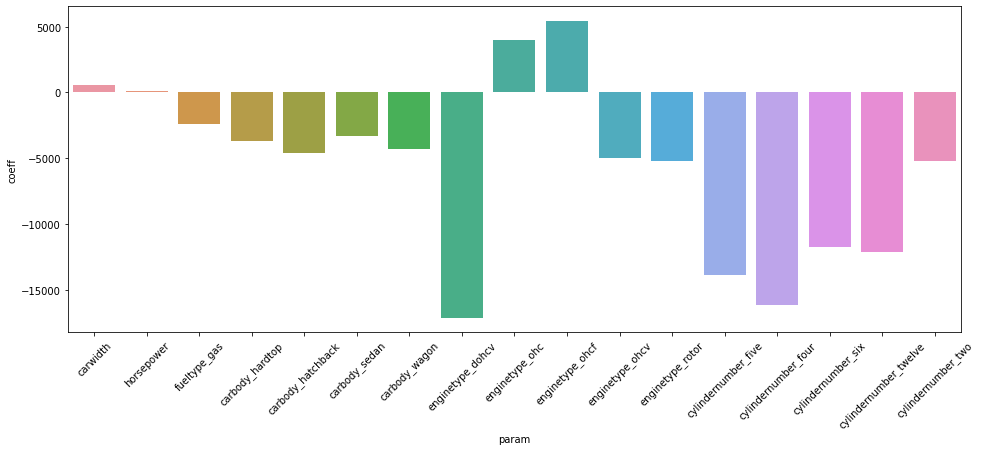

In [60]:
plt.figure(figsize=(16, 6))
sns.barplot(x = cars_corr_param['param'], y = cars_corr_param['coeff'])
plt.xticks(rotation= 45);

# _Выводы_

- В работе было проанализировано, как характеристики машин влияют на их стоимость. Разобраны модели с разным количеством предикторов и оставлена модель с оптимальным их количеством.
- Хотя марки машин и объясняют какую-то часть общей дисперсии в данных, эта часть не самая большая - около 4%. На фоне того, как эта переменная усложняет модель дополнительными статнезначимыми коэффициентами, можем принять решение выкинуть её из модели
- В качестве основной модели мы берем вторую модель - модель со всеми предикторами, кроме марок машин
- Выбранная модель объясняет примерно 90% дисперсии. Среди предикторов 10 из 27 оказались не значимыми (p > 0.05).
- Пример интерпретации: при единичном изменении показателя horsepower, цена возрастает на 86.8164.